In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import numpy as np
from pytrends.request import TrendReq
#sns.set_style("whitegrid")
#import altair as alt
#alt.renderers.enable("notebook")

import datetime as dt

# Code for hiding seaborn warnings
#import warnings
#warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## Google Trends:
<br>
<br>
extract google trend search using pytrends.
<br>

In [2]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25), retries=2, backoff_factor=0.1)

kw_list = ["Trump", 'Clinton']
#kw_list = ["unemployement", 'coronavirus', 'porn']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

data=pytrends.interest_over_time()
data.reset_index(inplace=True)

data.head()

,date,Trump,Clinton,isPartial
0,2015-08-23,4,1,False
1,2015-08-30,3,1,False
2,2015-09-06,3,1,False
3,2015-09-13,4,1,False
4,2015-09-20,3,1,False


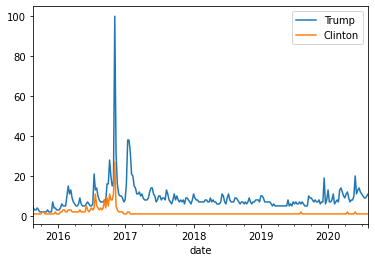

In [3]:
data.set_index('date', inplace=True)
data.plot()

# Economics data plots:

## Importing S&P 500 Data:
<br>
<br>
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-fred
<br>

### From Fred:
<br>
the data is limited to start time>01.01.2011
<br>

In [4]:
import pandas as pd
#if you get an error after executing the code, try adding below. pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
#start = datetime.datetime(2006, 1, 1)
#end = datetime.datetime(2020, 4, 27)

start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2020, 4, 27)

SP500 = web.DataReader(['sp500'], 'fred', start, end)

/home/simon/anaconda3/envs/simenv/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


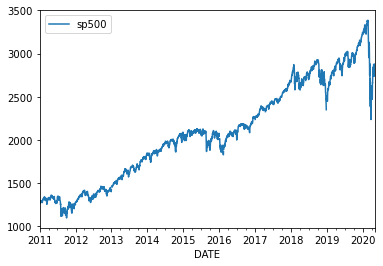

In [5]:
SP500.plot();

### S&P500 from yahoo finance:
<br>
<br>
the data from yahoo have the advantage to span a longer period.
<br>
<br>

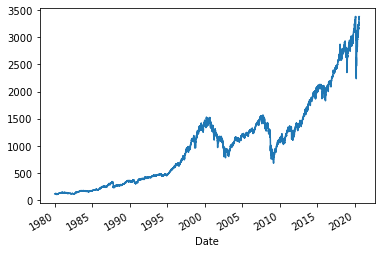

In [8]:
start=dt.datetime(1980, 1, 1)
#start=dt.datetime(2020, 1, 1)
#end=dt.datetime(2020, 4, 30)
end=dt.datetime.today().strftime('%Y-%m-%d')

#yahoo
df=web.DataReader('^GSPC', 'yahoo', start, end)
df['Adj Close'].plot()
plt.show()

## Stock query:
<br>
<br>

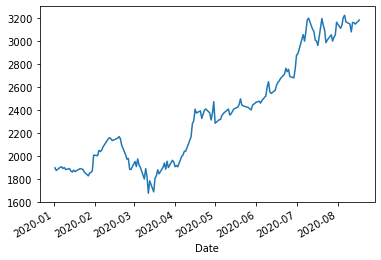

In [9]:
#AMZN --> Amazon

start=dt.datetime(2020, 1, 1)
end=dt.datetime.today().strftime('%Y-%m-%d')

#yahoo
df=web.DataReader('AMZN', 'yahoo', start, end)
#print(df.head())
df['Adj Close'].plot()
#df['Volume'].plot()
plt.show()

## List of companies in S&P500:
<br>
<br>


In [10]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df.to_csv('S&P500-Info.csv')
#df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])

In [11]:
df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [12]:
import pandas_datareader.data as web
import datetime as dt

start=dt.datetime(2005, 1, 1)
end=dt.datetime(2010, 12, 31)


lst_ticker=list(df['Symbol'].values)
for i in range(0, 10):
    ticker=lst_ticker[i]
    try:
        df2=web.DataReader(ticker, 'yahoo', start, end)
        #print(df.head())
    except KeyError:
        print(ticker)

ABBV


## Debt to GDP :
<br>
<br>

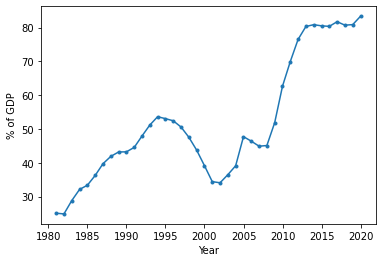

In [14]:
import matplotlib.pyplot as plt
#from matplotlib.pyplot import *
import quandl
from matplotlib.font_manager import FontProperties

debtarray = []
#debtarray.append("ODA/CHE_GGXWDN_NGDP")
debtarray.append("ODA/USA_GGXWDN_NGDP")
#USA
# Countries ISO codes: https://s3.amazonaws.com/quandl-static-content/API+Descriptions/WHO/ccodes.txt
quandl.ApiConfig.api_key = "Zzg6mpfNEhhxpDHagX6x"
series = quandl.get(debtarray,trim_start="1980-01-01", trim_end="2020-02-01",collapse="annual")
dateaxis = series.reset_index()['Date']
#ax1=series.ix
ax1=series.values
ax2=ax1[:, 0]

plt.plot(dateaxis, ax2, marker='.')
plt.xlabel("Year")
plt.ylabel("% of GDP")
#ax1.annotate(debtarray[1][4:-12], xy=(dateaxis[1], series.ix[:,1][1]), rotation=0)
plt.show()

### GDP per Capita:
<br>
<br>

In [17]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2008)
#dat.plot()

In [18]:
dat.head()

NY.GDP.PCAP.KD
country year                
Canada  2008    48495.204037
        2007    48534.174482
        2006    45857.996555
        2005    44471.080072
Mexico  2008     9587.636339

## Nominal GDP:
<br>
<br>

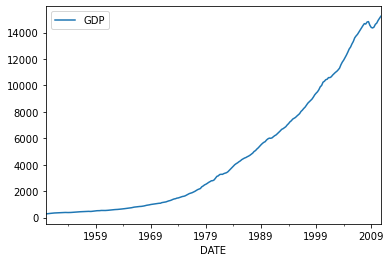

In [19]:
#import pandas_datareader.data as web
#import datetime

start = dt.datetime(1950, 1, 1)

#end = datetime.datetime(2013, 1, 27)

gdp = web.DataReader('GDP', 'fred', start, end)
#gdp.head()
gdp.plot()

## Inflation:
<br>
<br>

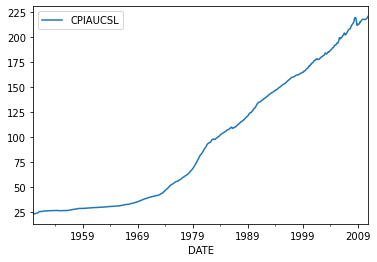

In [20]:
#['CPIAUCSL', 'CPILFESL']
inflation = web.DataReader(['CPIAUCSL'], 'fred', start, end)
inflation.head()
inflation.plot()

## Adjusted Monetary Base (US)
<br>
(discontinued)
<br>

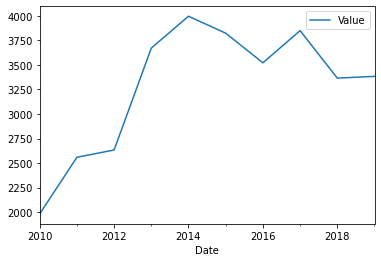

In [24]:
mm=quandl.get('FRED/BASE', trim_start="2010-01-01", trim_end="2020-08-01",collapse="annual")
mm.plot()

## Total Monetary Base (US)

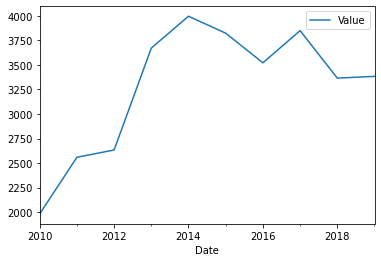

In [28]:
tm=quandl.get('FRED/BOGMBASEW')
tm.plot()